In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

# MSFT Data Download

In [2]:
initial_data = yf.download("MSFT", start="2022-04-01", end="2024-04-01")

[*********************100%%**********************]  1 of 1 completed


# Descriptives

In [3]:
initial_data.diff().describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,499.00,499.00,499.00,499.00,499.00,499.00
mean,0.22,0.22,0.23,0.22,0.23,-10499.60
std,5.08,4.59,4.50,5.23,5.18,10444590.29
min,-16.09,-12.94,-15.77,-19.34,-19.08,-56675300.00
25%,-2.85,-2.46,-2.26,-2.83,-2.80,-4515700.00
50%,0.25,0.20,0.31,0.06,0.08,-268100.00
75%,3.21,2.96,2.66,3.56,3.61,4490550.00
max,17.19,19.79,17.36,19.95,19.79,50541600.00


# Adj Close Stock Price

In [4]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,429.700012,429.859985,426.070007,428.739990,428.739990,17636500
2024-03-25,425.239990,427.410004,421.609985,422.859985,422.859985,18060500
2024-03-26,425.609985,425.989990,421.350006,421.649994,421.649994,16725600
2024-03-27,424.440002,424.450012,419.010010,421.429993,421.429993,16705000
2024-03-28,420.959991,421.869995,419.119995,420.720001,420.720001,21871200


In [5]:
close_data = initial_data["Adj Close"]
close_stats = close_data.diff().describe().round(2)
close_stats_df = pd.DataFrame(close_stats)
print(close_stats_df)

       Adj Close
count     499.00
mean        0.23
std         5.18
min       -19.08
25%        -2.80
50%         0.08
75%         3.61
max        19.79


# Stock Price Movement over TWO YEARS

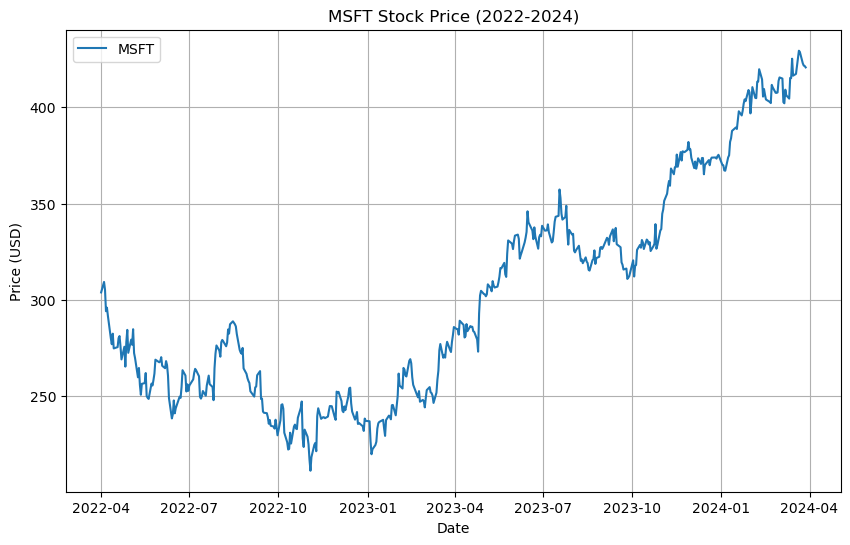

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(initial_data['Adj Close'], label="MSFT")
plt.title(f'MSFT Stock Price (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Annualized average log return and Annualized standard deviation

[*********************100%%**********************]  1 of 1 completed


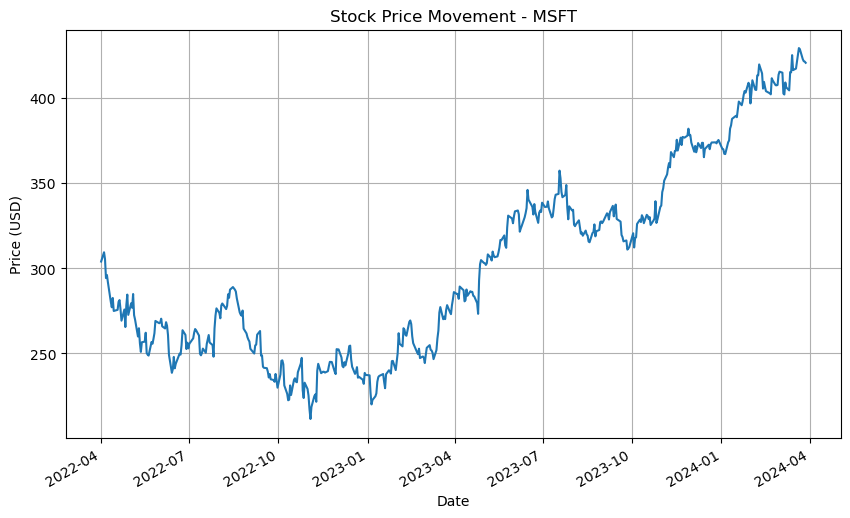

Annualized Average Log Return: 0.16423132080982675
Annualized Standard Deviation: 0.2925729697380887


In [106]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select equity (e.g., Microsoft - MSFT)
ticker = 'MSFT'

# Step 2: Download historical data
data = yf.download(ticker, start='2022-04-01', end='2024-04-01')

# Step 3: Plot price movement
plt.figure(figsize=(10, 6))
data['Adj Close'].plot()
plt.title('Stock Price Movement - ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Step 4: Calculate daily log returns
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Calculate annualized average log return
annualized_avg_log_return = data['Log Returns'].mean() * 252  # 252 trading days in a year

# Step 5: Calculate annualized standard deviation
annualized_std_dev = data['Log Returns'].std() * np.sqrt(252)

print('Annualized Average Log Return:', annualized_avg_log_return)
print('Annualized Standard Deviation:', annualized_std_dev)


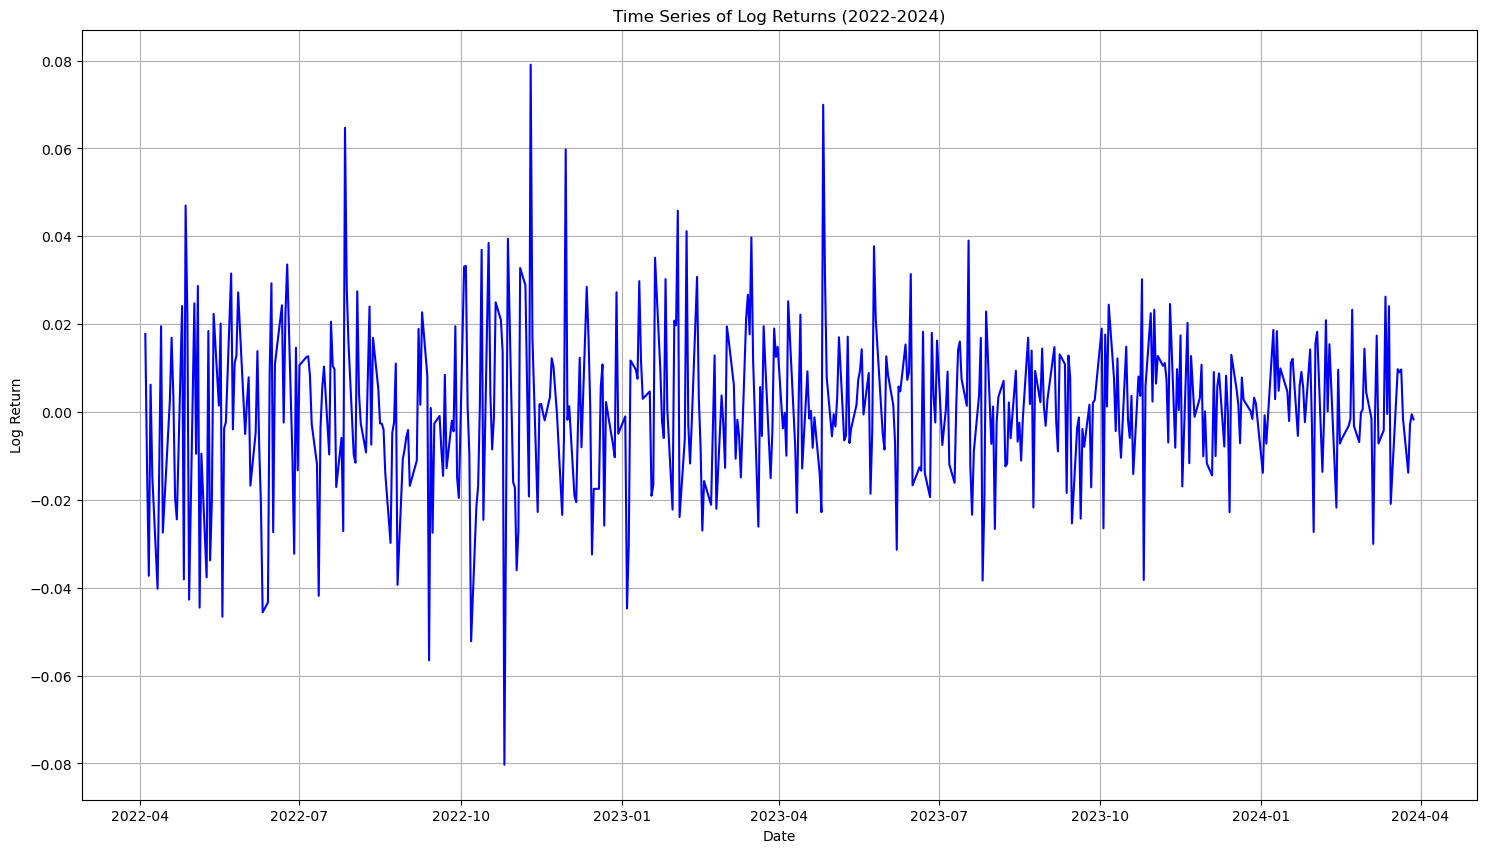

In [108]:
data['Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

plt.figure(figsize=(18, 10))
plt.plot(data['Log Return'], color='blue')
plt.title('Time Series of Log Returns (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

In [80]:
S0 = 428.74              # spot stock price
K = 402.0               # strike
T = 1.0                 # maturity 
r = 0.04                 # risk free rate 
sig = 0.29               # standard deviation (volatility)
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 

# METHODOLOGY

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
 
# Step 1: Option Design
S0 = yf.download("MSFT", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 402  # Strike price
T = 1  # Time to expiration (1 year)
r = 0.04  # Risk-free rate
sigma = 0.29  # Volatility
 
# Step 2a: Binomial Trees Option Pricing
def binomial_option_pricing(S0, K, T, r, sigma, n, option_type='call'):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    prices = np.zeros((n + 1, n + 1))
    option_values = np.zeros((n + 1, n + 1))
    for j in range(n + 1):
        prices[j, n] = S0 * (u ** (n - j)) * (d ** j)
        option_values[j, n] = max(0, prices[j, n] - K) if option_type == 'call' else max(0, K - prices[j, n])
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            prices[j, i] = S0 * (u ** (i - j)) * (d ** j)
            option_values[j, i] = np.exp(-r * dt) * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])
    return option_values[0, 0]
 
n = 100  # Number of steps in the binomial tree
binomial_price = binomial_option_pricing(S0, K, T, r, sigma, n)
 
# Step 2b: Black-Scholes-Merton Option Pricing
def black_scholes_option_pricing(S0, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        option_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return option_price
 
black_scholes_price = black_scholes_option_pricing(S0, K, T, r, sigma)
 
# Step 2c: Monte Carlo Simulation Option Pricing
def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps, option_type='call'):
    dt = T / num_steps
    simulations = np.zeros((num_simulations, num_steps + 1))
    simulations[:, 0] = S0
    for i in range(num_simulations):
        for j in range(1, num_steps + 1):
            z = np.random.normal(0, 1)
            simulations[i, j] = simulations[i, j - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    if option_type == 'call':
        payoffs = np.maximum(simulations[:, -1] - K, 0)
    else:
        payoffs = np.maximum(K - simulations[:, -1], 0)
    option_price = np.mean(payoffs) * np.exp(-r * T)
    return option_price
 
num_simulations = 100000
num_steps = 252  # Assuming 252 trading days in a year
monte_carlo_price = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps)
 
# Step 3: Comparison of Results
print("Binomial Tree Option Price:", binomial_price)
print("Black-Scholes Option Price:", black_scholes_price)
print("Monte Carlo Option Price:", monte_carlo_price)

[*********************100%%**********************]  1 of 1 completed


Binomial Tree Option Price: 65.78868751486583
Black-Scholes Option Price: 65.75037418108505
Monte Carlo Option Price: 65.6012349406538


# Binomial Tree Option Pricing

[*********************100%%**********************]  1 of 1 completed


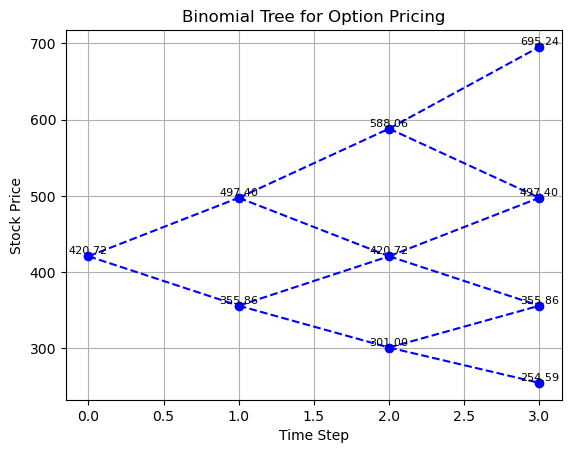

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate binomial tree
def generate_binomial_tree(S0, K, T, r, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            tree[i, j] = S0 * (u ** (j - i)) * (d ** i)
    
    return tree

# Plot binomial tree
def plot_binomial_tree(tree):
    n = tree.shape[1] - 1
    for j in range(n+1):
        for i in range(j+1):
            plt.plot(j, tree[i, j], 'bo')
            plt.text(j, tree[i, j], f'{tree[i, j]:.2f}', va='bottom', ha='center', fontsize=8)
    
    for j in range(n):
        for i in range(j+1):
            plt.plot([j, j+1], [tree[i, j], tree[i, j+1]], 'b--')
            plt.plot([j, j+1], [tree[i, j], tree[i+1, j+1]], 'b--')

    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.title('Binomial Tree for Option Pricing')
    plt.grid(True)
    plt.show()

# Parameters
S0 = yf.download("MSFT", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 402    # Strike price
T = 1      # Time to expiration (1 year)
r = 0.04   # Risk-free rate
sigma = 0.29   # Volatility
n = 3      # Number of steps in the binomial tree

# Generate and plot binomial tree
tree = generate_binomial_tree(S0, K, T, r, sigma, n)
plot_binomial_tree(tree)


# Monte Carlos Simulation

[*********************100%%**********************]  1 of 1 completed


Monte Carlo Price (Call Option): 65.50871917933762


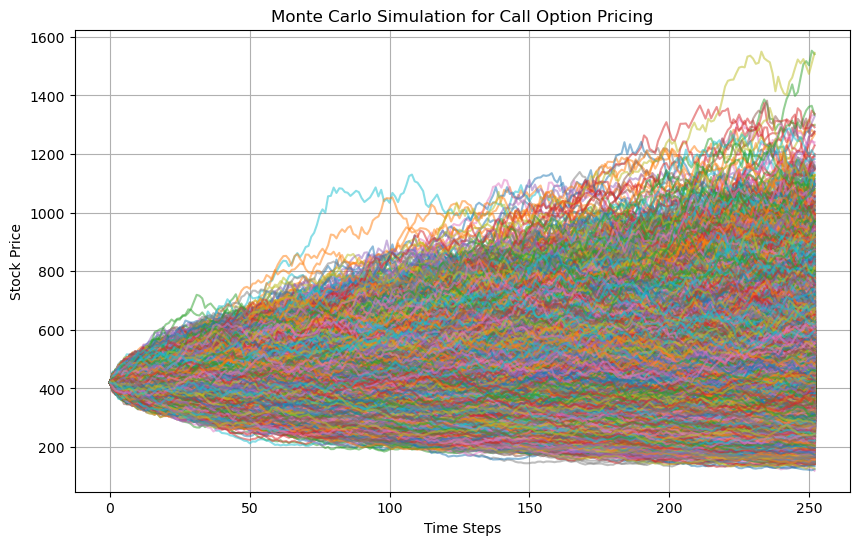

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

S0 = yf.download("MSFT", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 402.0                # strike
T = 1.0                  # maturity 
r = 0.04                 # risk-free rate 
sigma = 0.29             # standard deviation (volatility)
N = 3                    # number of periods or number of time steps  
payoff = "call"          # payoff 

def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps, option_type='call'):
    dt = T / num_steps
    simulations = np.zeros((num_simulations, num_steps + 1))
    simulations[:, 0] = S0
    for i in range(num_simulations):
        for j in range(1, num_steps + 1):
            z = np.random.normal(0, 1)
            simulations[i, j] = simulations[i, j - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    if option_type == 'call':
        payoffs = np.maximum(simulations[:, -1] - K, 0)
    else:
        payoffs = np.maximum(K - simulations[:, -1], 0)
    option_price = np.mean(payoffs) * np.exp(-r * T)
    return simulations, option_price

num_simulations = 100000
num_steps = 252  # Assuming 252 trading days in a year
simulations, monte_carlo_price_call = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps, option_type='call')
print("Monte Carlo Price (Call Option):", monte_carlo_price_call)

# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(np.arange(num_steps + 1), simulations[i], alpha=0.5)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation for Call Option Pricing')
plt.grid(True)
plt.show()

# Plot histogram of option prices
plt.figure(figsize=(10, 6))
plt.hist(simulations[:, -1], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Option Price')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Call Option Prices')
plt.grid(True)
plt.show()


In [15]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
        # Price process, see Hilpisch (2015) chapter 1 (equation 1-1) & chapter 3 (equation 3-6)
    return S

In [16]:
T = 1
r = 0.04
sigma = 0.29
S0 = yf.download("MSFT", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 402

[*********************100%%**********************]  1 of 1 completed


In [17]:
S = mcs_simulation_np(1000)

In [18]:
S = np.transpose(S)
S

array([[420.72000122, 419.21902017, 419.61798544, ..., 493.58015509,
        496.71348073, 502.93127329],
       [420.72000122, 421.72857849, 418.71589672, ..., 353.1713492 ,
        351.02880717, 348.13965945],
       [420.72000122, 415.16368955, 415.89980983, ..., 478.09229448,
        481.32726988, 484.58775595],
       ...,
       [420.72000122, 413.19745456, 409.28617345, ..., 372.30885117,
        369.03023654, 363.90000923],
       [420.72000122, 421.12118533, 423.9171371 , ..., 376.09892508,
        379.85622222, 378.70350469],
       [420.72000122, 421.43310144, 427.85809994, ..., 274.71343408,
        271.05988383, 269.88569621]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

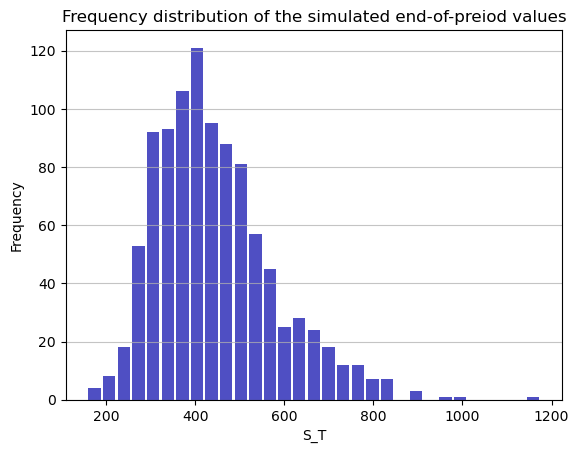

In [19]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# OPTION VALUE

In [8]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [9]:
euro_option_bs(428.74, 402.0, 1, 0.04, 0.29, 'call')

71.21760479453076

In [10]:
S = np.linspace(50,700,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bs(S[i], 402, 1, 0.04, 0.29, 'call')

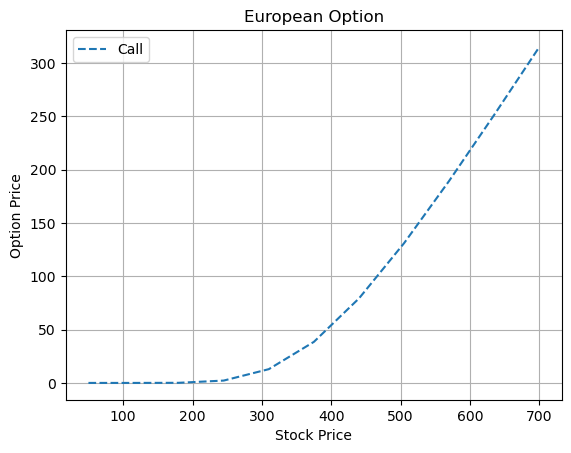

In [11]:
fig = plt.figure()
plt.plot(S, Call, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call'])

# DELTA

In [23]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [24]:
delta( 428.74, 402, 1, 0.04, 0.29, 'call')

0.6932188696631373

In [25]:
S = np.linspace(50,700,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 402, 1, 0.04, 0.29, 'call')

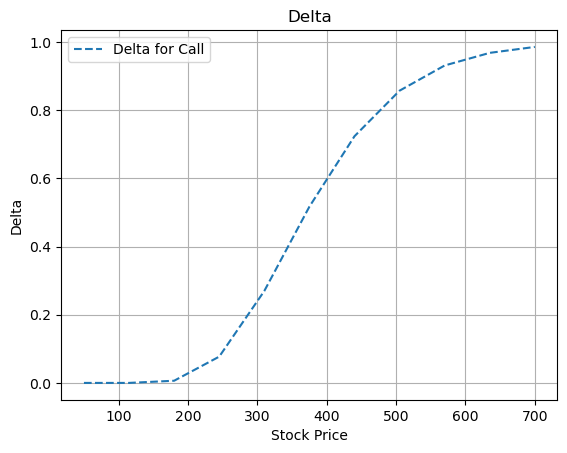

In [26]:
fig = plt.figure()
plt.plot(S, Delta_Call, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [35]:
S = np.linspace(50, 700, 11)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 402, T[i], 0.04, 0.29, 'call')

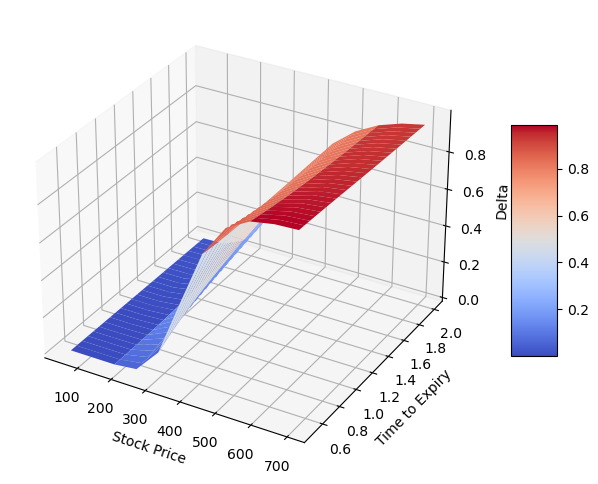

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
#rstride: the array of row stride (step size) cstride: the array of column stride.
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# GAMMA

In [38]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [39]:
gamma( 428.74, 402, 1, 0.04, 0.29, 'call')

0.0028244972651698796

In [40]:
S = np.linspace(100,1000,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 402, 1, 0.04, 0.29, 'call')

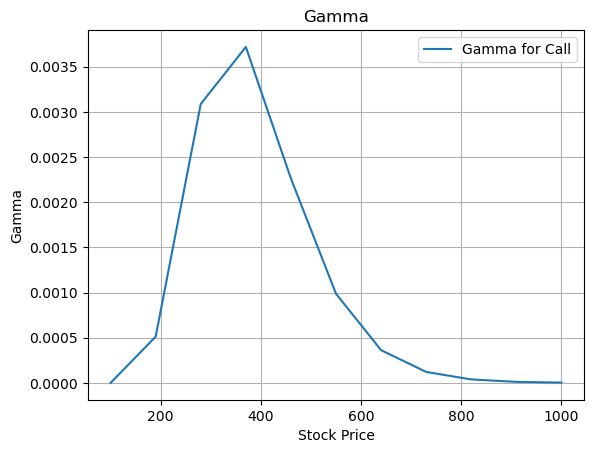

In [41]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [43]:
S = np.linspace(100, 1000, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 402, T[i], 0.04, 0.29, 'call')

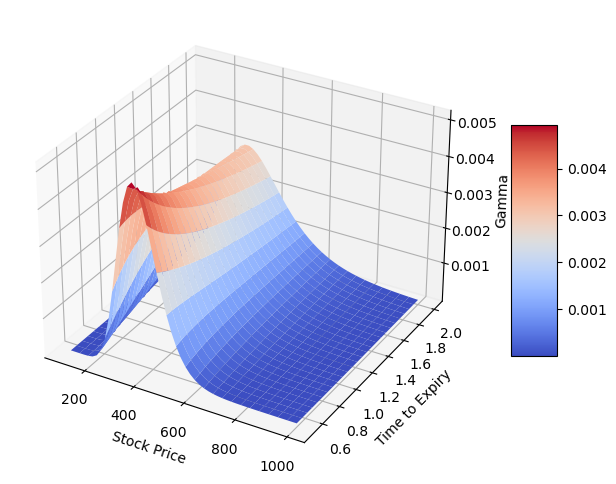

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# THETA

In [83]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [84]:
theta( 428.74, 402, 1, 0.04, 0.29, 'call')

-30.871804742696668

In [85]:
T = np.linspace(0.25, 3, 12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(428.74, 402, T[i], 0.04, 0.29, 'call')

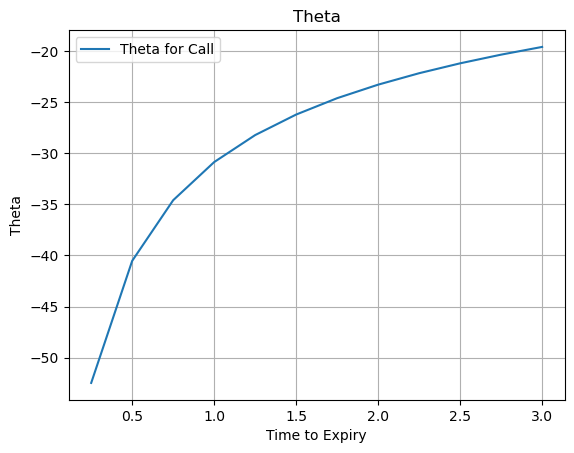

In [86]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

# VEGA

In [64]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [65]:
vega( 428.74, 402, 1, 0.04, 0.29, 'call')

150.56608694691695

In [66]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(428.74, 402, 1, 0.04, vol[i], 'call')

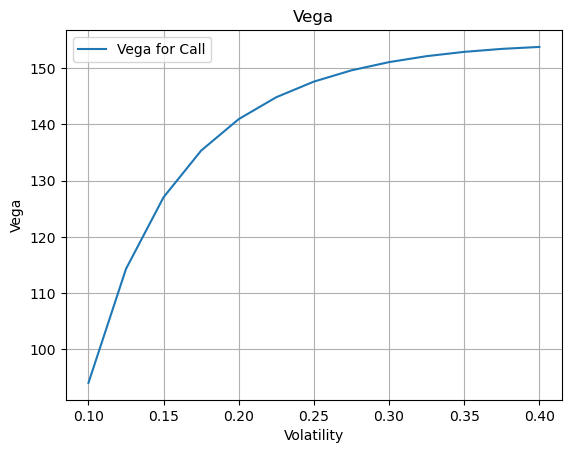

In [67]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])